# Classification Methodology

![](banner_classification.jpg)

_<p style="text-align: center;"> The Oracle of Delphi predicted, "You are invincible, my son!" <br/> Alexander replied, "Now I have my answer." </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)                     
update_geom_defaults("point", list(size=5, colour="grey50"))
update_geom_defaults("text",  list(size=8, vjust=0.5))

.................................................... start of document ....................................................

Classifier construction methods construct classifiers based on reference classified data that can predict how new unclassified data should be classified.

## Introduction

The legend goes that Alexander the Great, before embarking on a campaign of world conquest, first visited the Oracle of Delphi, known for her ability to predict the future.  Alexander asked the oracle how the campaign would fare, but she replied that such a prediction could not be made with certainty.  Unsatisfied, Alexander pressured her until she predicted, "You are invincible, my son!"  Then satisfied, Alexander concluded, "Now I have my answer," and decided to proceed with the campaign.

Classifier construction methods construct classifiers that can make predictions.  They do so by identifying patterns in some reference classified data, where classified data here means a dataset that includes some **categorical** variable with known values that indicate the class of each observation.  The classifiers constructed by these methods then leverage the patterns to predict, with some level of certainty, the class variable value of each observation in some new unclassified data.  Making such predictions is called classification.

Classification is useful in a variety of business applications, notably any time it is advantageous to have categorical predictions about the future based on what happened in the past, which is pretty much all the time.  For example, you may want to predict whether a project will be successful based on what kind of projects were successful in the past, or predict whether a machine part will fail within a certain time period based on how machine parts failed in the past, or predict whether customers will like a new product based on what kind of products they liked in the past, or predict whether a new credit card transaction will turn out to be fraudulent based on circumstances around fraudulent credit card transactions in the past.  Classification is also useful for making predictions about the past, present, or future based on the past, present, or future, in general.  For example, you may want to predict whether a competitor is presently a threat to your business based on past demand for products, present supply chain structure, and projected future raw material prices. 

Let's consider more carefully how we might predict whether a machine part will fail within a certain time period, say within a month.  Repairing a part that won't fail soon is an unnecessary expense, repairing a part just before it fails is a modest expense, and repairing an already failed part is a large expense.  Operating conditions of parts throughout your factory are continuously monitored by copious sensors, which once per minute report their pressure and temperature measurements to a central computer via wireless internet connection.  Technicians report information about failed parts whenever they make repairs, which is sent to the same central computer and aligned with the pressure and temperature data.  The combined data is transformed into a representation in which each observation corresponds to a part, the pressures and temperatures of the part over a month, the pressures and temperatures of other parts over a month, and a status indicating whether the part had to be repaired at the end of the month. A classifier construction method is applied to the data weekly, which finds patterns that distinguish parts about to fail from parts that aren't, and constructs a classifier to predict that.  The classifier is applied to new data as it's updated over the week, predicts which parts are likely to fail within a month, and generates a notification to the technicians to preemptively investigate and repair those parts before they fail, avoiding significant expense.       

There are several popular classifier construction methods, including logistic regression, naive Bayes, support vector machine, perceptron, neural network, decision tree, and k-nearest neighbors.

## Lesson Plan

We'll first overview the classification methodology, which comprises processes for construction, prediction, and evaluation.  Then we'll demonstrate the methodology with a pedagogical classifer construction method applied to pedagogical data to construct a classifier.  Then we'll use the classifier's back-predictions to construct a confusion matrix and calculate various performance metrics.  We'll end with a comparison of three specific evaluation processes: in-sample performance estimation, out-of-sample performance estimation, and cross-validation performance estimation.

## Terminology

Here are some new terms that we will use in our discourse.

* Prediction
* Classification, Predictive modeling
* Classifier construction method
* Classifier, Model
* Construction, Supervised learning, Training, Fitting
* Predictor variables
* Class variable
* Hyperparameters
* Parameters
* Cutoff
* Evaluation
* Confusion matrix
* Accuracy
* True positive rate, True negative rate, False positive rate, False negative rate
* In-Sample Performance
* Out-of-Sample Performance
* Cross-Validation Performance

## Classification Methodology

The classification methodology comprises three parts:
* **construction** of a classifier, using some classifier construction method and some reference classified data
* **prediction** of class variable values, using the classifier applied to some unclassified data
* **evaluation** of the classifier performance, which estimates the quality of the classifier's predictions

### Construction

In construction, a classifier construction method takes as input some reference classified data and hyperparameter settings.  The job of the classifier construction method is then to detect patterns in the reference classified data that distinguish observations of different classes, and output a classifier with knowledge of those patterns built into it.  The constructed classifier is defined by its form and parameter settings, both determined by the classifier construction method.  Note that we have here a method constructing a method - the constructed classifier is not a set of predictions, but rather is a method to estimate class probabilities to make predictions.

Hyperparameters are provided by a classifier construction method as a way to configure its specific behavior.  Each particular classifier construction method provides its own set of hyperparameters.  You can think of hyperparameters as switches and dials to set the operating conditions of a classifier construction machine.  Hyperparameters allow for several variations of any particular classifier construction method, effectively expanding the set of methods available for classifier construction.

Parameters, in contrast to hyperparameters, are components of a classifier, set by a classifier construction method.  You can think of parameters as switches and dials to set the operating conditions of a classifier machine.

Construction is also known as supervised learning, training, modeling, building a model, or fitting a model.

Here we see a reference classified dataset with five observations and nine variables.  Eight of the variables are treated as predictor variables and one categorical variable is treated as the class variable, which can take on values of A or B.  The classifier construction method is configured to specific behavior by you setting the hyperparameters.  The method outputs a classifier that will accept a dataset with eight variables as input and estimate class probabilities as output.

<table style="border:1px solid; margin-top:20px">
    <caption style="text-align:center">Construct a Classifier</caption>
    <tr><td style="padding:20px; background-color:white"><img src="classification_train.jpg" width=440></td></tr>
</table><br clear=all>

### Prediction

In prediction, a classifier takes as input some unclassified data.  The job of the classifier is then to use its built-in knowledge of patterns in reference classified data to estimate probabilities about how the unclassified data should be classified.  Each observation in the unclassified data gets its own probability of being assigned a particular class value.  Arbitrarily treat one class value as the positive class and the other class value as the negative class.  Then, to make a prediction, an observation's class probability for the positive class can be compared to some cutoff.  If the class probability is equal to or exceeds the cutoff, then conclude the observation's class to be some certain value.  If the class probability does not exceed the cutoff, then conclude the observation's class to be some other value.  Note that we have here a method constructed by a method - the classifier is the output of a classifier construction method, and the classifier is itself a method to estimate class probabilities that can be used to make predictions.

Often you set the cutoff to 0.50, so that observations with probabilities equal to or exceeding 0.50 are classified one way and all other observations are classified another way.  But the cutoff doesn't have to be set to 0.50.  Rather, the cutoff can be set to any number in the range 0 to 1, depending on the business situation.  When the cutoff is set higher than 0.50, it means that the classifier must be even more sure about how observations should be classified before making conclusions.  Imagine predicting whether an extremely expensive project will succeed - you may want to be much more than 50% sure that it will succeed before you conclude that it will succeed and proceed with funding it.  When the cutoff is set lower than 0.50, it means that the classifier can be less sure.  Imagine predicting whether an inexpensive project with a high potential return will succeed - you may be comfortable funding it even if you're less than 50% sure it will succeed.

Prediction in this context, is also known as classification.

Here we see an unclassified dataset with five observations and eight variables.  The classifier accepts the dataset as input and outputs estimated class probabilities for the positive class.  The classifier estimates a 40% probability that the first observation should be classified as A, and therefore a 60% probability that the first observation should be classified as B.  You earlier set the cutoff to 0.5, and since the probability estimated for the first observation does not exceed the cutoff, you can conclude that the first observation should be classified as B.  Similarly for the other observations. 

<table style="border:1px solid; margin-top:20px; margin-bottom:20px">
    <caption style="text-align:center">Use a Classifier to Make Predictions</caption>
    <tr><td style="padding:20px; background-color:white"><img src="classification_predict.jpg" width=560></td></tr>
</table><br clear=all>

### Evaluation

In evaluation, we usually estimate the quality of an operative classifier's predictions by examining not the operative classifier directly, but rather by examining one or more other similar classifiers.  These other similar classifiers are constructed by the same classifier construction method and hyperparameter settings, but with different reference classified data as input.  Further, the different reference classified data for the similar classifiers are all subsets of the reference classified data for the operative classifier.  So, the only difference between the similar classifiers and the operative classifier is which subsets of the reference classified data are used as input to construct them.  Because the similar classifiers are constructed in almost the same way that the operative classifier was, we make the assumption that their performance will be similar to that of the operative classifier.  We can then take estimates of the similar classifiers' performance as an estimate of the operative classifier's performance. 

Intregal to the examination of a similar classifer is the construction of its confusion matrix subject to a cutoff setting, which indicates to what kind of correct predictions and what kind of incorrect predictions, and in what proportions, the classifier's estimated probabilities will likely lead.  From the confusion matrix, any of several useful performance metrics can be calculated, which can be used in combination with other business considerations to estimate the quality of the classifier's predictions.

Note that the similar classifiers are required only as a way to estimate the operative classifier's performance.  You can discard the similar classifiers after the operative classifier's performance has been estimated.  Their job will have been done. 

The reason that we usually do not examine an operative classifier directly, but rather examine similar classifiers, is so that we can leverage reference classified data in various useful ways. 

Evaluation is also known as validation or testing.

Here we see an operative classifier being evaluated.  The reference classified data used to construct the operative classifier is provided to a process that partitons the dataset as necessary.  The process inputs those dataset subsets to the classifier construction method that was used to construct the operative classifier, and ultimately constructs one or more confusion matrices as necessary.  From the confusion matrices, the operative classifier's accuracy, a performance metric, is calculated to be 0.5.

<table style="border:1px solid; margin-top:20px; margin-bottom:20px">
    <caption style="text-align:center">Evaluate a Classifier</caption>
    <tr><td style="padding:20px; background-color:white"><img src="classification_evaluate.jpg" width=650></td></tr>
</table><br clear=all>

## Demonstration of Methodology

Let's see the classification methodology demonstrated.

### Data

Consider this pedagogical reference classified dataset.  Note that the class variable is categorical and indicates each observation's known class.

In [2]:
data = data.frame(x1=c(3,2,9,0,3), x2=c(5,3,3,0,2), class=c("A","A","B","B","A"))
fmt(data)

x1,x2,class
3,5,A
2,3,A
9,3,B
0,0,B
3,2,A


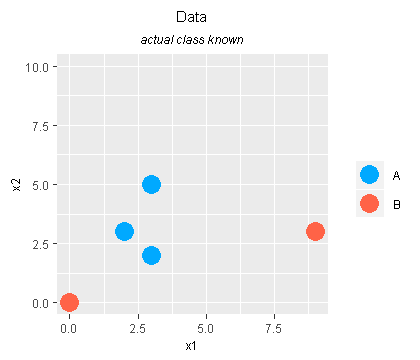

In [3]:
output_size(3.5,3)
ggplot(data) + ggtitle("Data", "actual class known") + ylim(0,10) +
geom_point(aes(x=x1, y=x2, color=factor(class, c("A","B"))))
output_size(restore)

### Construction

Use some classifier construction method to construct a classifier.  Here we use the "Special Classifier Construction Method", with its hyperparameter set to 0.7, applied to the reference classified dataset.  The resulting classifier has some form which is not readily transparent to us, but we do see that it is defined by parameter settings 0.35 and 3.4, will accept datasets with two variables x1 and x2 as input, and will output estimated class probabilities for class values A and B.  Note that the hyperparameter setting is not present in the classifier, though it is reflected in how the parameter settings are determined.

In [4]:
model = my_classifier_construction_method(class ~ x1+x2, data, hyperparameter=0.7)
fmt.model(model)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,3.4,"A, B"


### Prediction

Here is some new unclassified dataset. We are interested in classifying it. 

x1,x2
3,3
2,3
0,0
9,9
1,2


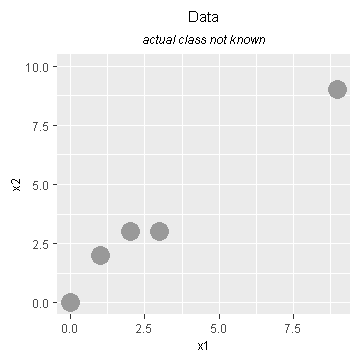

In [5]:
new = data.frame(x1=c(3,2,0,9,1), x2=c(3,3,0,9,2))
fmt(new)

output_size(3,3)
ggplot(new) + ggtitle("Data", "actual class not known") + ylim(0,10) +
geom_point(aes(x=x1, y=x2), color=NEW_COLOR) +
theme.no_legend
output_size(restore)

Use the classifier applied to the new unclassified dataset to estimate its observations' class probabilities.

In [6]:
prob = predict(model, new)
new$prob.A = prob[,"A"]

layout(fmt(prob), fmt(new))

prob 
 
 
 A 
 B 
 
 
 
 
 0.6176471 
 0.3823529 
 
 
 0.4117647 
 0.5882353 
 
 
 0.0000000 
 1.0000000 
 
 
 1.0000000 
 0.0000000 
 
 
 0.2058824 
 0.7941176 
 
 
 
 new 
 
 
 x1 
 x2 
 prob.A 
 
 
 
 
 3 
 3 
 0.6176471 
 
 
 2 
 3 
 0.4117647 
 
 
 0 
 0 
 0.0000000 
 
 
 9 
 9 
 1.0000000 
 
 
 1 
 2 
 0.2058824

Use the class probabilites and a cutoff to classify the new unclassified dataset.  Here the cutoff has been set to 0.5 and we are treating class value A as the positive class, so we can conclude that the observations should be classified accordingly.

In [7]:
cutoff = 0.5
class.predicted = as.class(prob, class="A", cutoff)
new$class.predicted = class.predicted

layout(fmt(cutoff, force=TRUE), fmt(class.predicted, force=TRUE), fmt(new))

cutoff 
 
 
 
 
 0.5 
 
 
 
   
 
 
 class.predicted 
 
 
 
 
 A 
 
 
 B 
 
 
 B 
 
 
 A 
 
 
 B 
 
 
 
 new 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 
 
 
 
 3 
 3 
 0.6176471 
 A 
 
 
 2 
 3 
 0.4117647 
 B 
 
 
 0 
 0 
 0.0000000 
 B 
 
 
 9 
 9 
 1.0000000 
 A 
 
 
 1 
 2 
 0.2058824 
 B

Here is the reference classified data compared to the new data as the classifier would have it classified.

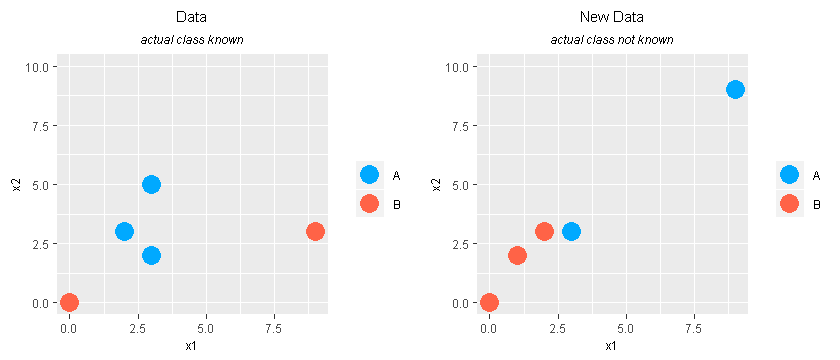

In [8]:
output_size(7,3)

p1 = ggplot(data) + ggtitle("Data", "actual class known") + ylim(0,10) +
     geom_point(aes(x=x1, y=x2, color=factor(class, c("A","B"))))

p2 = ggplot(new) + ggtitle("New Data", "actual class not known") + ylim(0,10) +
     geom_point(aes(x=x1, y=x2, color=factor(class.predicted, c("A","B"))))

grid.arrange(p1, p2, nrow=1)

output_size(restore)

### Evaluation

Here we are interested in estimating the quality of the classifier's predictions.

#### Back-Prediction

We can know if a classifier predicts correctly or incorrectly only when we can compare predicted class values to known class values.  Back-prediction involves using a classifier to predict class values of already classified observations, but in a way that the known class values are hidden from the classifier.  Then the classifier's predicted class values can be compared to the known class values.  Back-prediction can be applied to the reference classified dataset that was used to construct the classifier, or to a subset of that dataset, or to a completely different dataset.

Here we apply back-prediction to the reference classified dataset with the class values hidden.

In [9]:
data.u = data; data.u$class = NULL
layout(fmt(data), fmt(data.u, "data (known class is hidden)"))

data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 3 
 5 
 A 
 
 
 2 
 3 
 A 
 
 
 9 
 3 
 B 
 
 
 0 
 0 
 B 
 
 
 3 
 2 
 A 
 
 
 
 data (known class is hidden) 
 
 
 x1 
 x2 
 
 
 
 
 3 
 5 
 
 
 2 
 3 
 
 
 9 
 3 
 
 
 0 
 0 
 
 
 3 
 2

Use the classifier (previously constructed) to estimate class probabilities of the observations.

In [10]:
prob = predict(model, data.u)
data.u$prob.A = prob[,"A"]

layout(fmt(prob), fmt(data.u, "data (known class is hidden)"))

prob 
 
 
 A 
 B 
 
 
 
 
 0.6176471 
 0.3823529 
 
 
 0.4117647 
 0.5882353 
 
 
 1.0000000 
 0.0000000 
 
 
 0.0000000 
 1.0000000 
 
 
 0.6176471 
 0.3823529 
 
 
 
 data (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 
 
 
 
 3 
 5 
 0.6176471 
 
 
 2 
 3 
 0.4117647 
 
 
 9 
 3 
 1.0000000 
 
 
 0 
 0 
 0.0000000 
 
 
 3 
 2 
 0.6176471

Use class probabilites and a cutoff to predict class values of the observations.  The predicted class values may be different than the known class values.

In [11]:
cutoff = 0.5
data.u$class.predicted = as.class(prob, class="A", cutoff)

layout(fmt(cutoff, force=TRUE), fmt(data.u, "data (known class is hidden)"))

cutoff 
 
 
 
 
 0.5 
 
 
 
 data (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 
 
 
 
 3 
 5 
 0.6176471 
 A 
 
 
 2 
 3 
 0.4117647 
 B 
 
 
 9 
 3 
 1.0000000 
 A 
 
 
 0 
 0 
 0.0000000 
 B 
 
 
 3 
 2 
 0.6176471 
 A

#### Comparison

Compare the predicted class values to the known class values.  Mark each observation as a hit if it was classified correctly or as a miss if it was classified incorrectly.

In [12]:
data.u$hit = data.u$class.predicted == data$class
layout(fmt(data), fmt(data.u, "data (known class is hidden)"))

data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 3 
 5 
 A 
 
 
 2 
 3 
 A 
 
 
 9 
 3 
 B 
 
 
 0 
 0 
 B 
 
 
 3 
 2 
 A 
 
 
 
 data (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 hit 
 
 
 
 
 3 
 5 
 0.6176471 
 A 
 TRUE 
 
 
 2 
 3 
 0.4117647 
 B 
 FALSE 
 
 
 9 
 3 
 1.0000000 
 A 
 FALSE 
 
 
 0 
 0 
 0.0000000 
 B 
 TRUE 
 
 
 3 
 2 
 0.6176471 
 A 
 TRUE

Here is a visualization of the dataset showing how specific observations have been correctly or incorrected classified.

* The first observation [x1=3, x2=5] is known to be in class A and it was correctly predicted to be in class A.
* The second observation [x1=2, x2=3] is known to be in class A and it was incorrectly predicted to be in class B.
* The third observation [x1=9, x2=3] is known to be in class B and it was incorrectly predicted to be in class A.
* The fourth observation [x1=0, x2=0] is known to be in class B and it was correctly predicted to be in class B.
* The fifth observation [x1=3, x2=2] is known to be in class A and it was correctly predicted to be in class A.

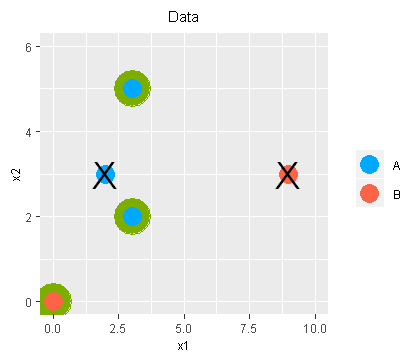

In [13]:
output_size(3.5,3)
ggplot(data) + ggtitle("Data") + xlim(0,10) + ylim(0,6) +
geom_point(aes(x=x1, y=x2), color=PALETTE[3], size=10, data=data.u[data.u$hit,]) +
geom_point(aes(x=x1, y=x2, color=factor(class))) +
geom_text(aes(x=x1, y=x2), label="X", data=data.u[!data.u$hit,])
output_size(restore)

Calculate some performance metric based on the prediction hits and misses.  Here we calculate the proportion of correct predictions.  This is our estimate of the quality of our classifier's predictions.

In [14]:
fmt(sum(data.u$hit==TRUE) / nrow(data.u), "proportion of correct predictions")

proportion of correct predictions
0.6


## Confusion Matrix & Performance Metrics

### Confusion Matrix

A confusion matrix conveniently summarizes how a classifier and cutoff correctly or incorrectly back-predict class values of some data, and provides a convenient way to calculate performance metrics.  Usually it is structured as a 2x2 matrix, rows corresponding to predicted class values, columns corresponding to known class values, and the arbitrarily chosen positive class value positioned before the negative class value - this is the form that we will use.  In other contexts, it may be a 2x2 matrix with the sense of the rows and columns switched, or as frequency table.  

The four values contained in a confusion matrix can be absolute numbers of observations or relative numbers of observations.  By convention, we label a confusion matrix with upper case letters if it contains absolute numbers and with lower case letters if it contains relative numbers.  

How to interpret a confusion matrix:

* Row 1, Column 1: how many observations are predicted positive class and known to be positive class
* Row 2, Column 1: how many observations are predicted negative class but known to be positive class
* Row 1, Column 2: how many observations are predicted positive class but known to be negative class
* Row 2, Column 2: how many observations are predicted negative class and known to be negative class

Here we see absolute and relative confusion matrices (in usual and frequency tabel forms) for the previously constructed classifier and cutoff 0.5 applied to back-predict the reference classified data.

* 2 observations (40%) are predicted to be class A and known to be class A (upper left part confusion matrix)
* 1 observation (20%) is predicted to be class B but known to be class A (lower left part of confusion matrix)
* 1 observation (20%) is predicted to be class A but known to be class B (upper right part of confusion matrix)
* 1 observation (20%) is predicted to be class B and known to be class B (lower right part of confusion matrix)

In [15]:
CM = confusionMatrix(data.u$class.predicted, data$class, positive="A")$table
layout(fmt.cm(CM), fmt(CM, "CM (as frequency table)"))

,A,B
A,2,1
B,1,1
Prediction,Reference,Freq
A,A,2
B,A,1
A,B,1
B,B,1


In [16]:
cm = CM / sum(CM)
layout(fmt.cm(cm), fmt(cm, "cm (as frequency table)"))

,A,B
A,0.4,0.2
B,0.2,0.2
Prediction,Reference,Freq
A,A,0.4
B,A,0.2
A,B,0.2
B,B,0.2


### Performance Metrics

Popular model performance metrics can be derived from the confusion matrix.

Treat one class name as "positive" and the other class name as "negative".

* **accuracy:** correct predictions $\div$ total predictions
* **true positive rate (aka sensitivity, aka recall):** correct positive predictions $\div$ positive actuals
* **true negative rate (aka specificity):** correct negative predictions $\div$ negative actuals
* **false positive rate:** incorrect positive predictions $\div$ negative actuals
* **false negative rate:** incorrect negative predictions $\div$ postive actuals
* **positive predictive value (aka precision):** correct positive predictions $\div$ positive predictions
* **negative predictive value:** correct negative predictions $\div$ negative predictions
* **f1 score:**<br>(2 $\times$ correct positive predictions) $\div$<br>((2 $\times$ correct positive predictions) + incorrect positive predictions + incorrect negative predictions)

Here is an example of a confusion matrix and some corresponding performance metric calculations.

In [17]:
fmt.cm(cm)

accuracy = (cm[1,1]+cm[2,2])/sum(cm)
tpr = cm[1,1]/sum(cm[,1])
tnr = cm[2,2]/sum(cm[,2])
fpr = cm[1,2]/sum(cm[,2])
fnr = cm[2,1]/sum(cm[,1])
ppv = cm[1,1]/sum(cm[1,])
npv = cm[2,2]/sum(cm[2,])
f1 = (2*cm[1,1])/((2*cm[1,1])+cm[2,1]+cm[1,2])

data.frame(accuracy, tpr, tnr, fpr, fnr, ppv, npv, f1)

,A,B
A,0.4,0.2
B,0.2,0.2


accuracy,tpr,tnr,fpr,fnr,ppv,npv,f1
0.6,0.6666667,0.5,0.5,0.3333333,0.6666667,0.5,0.6666667


* accuracy is 60% (sum of diagonal divided sum of all)
* true positive rate is 67% (upper left divided by sum of all left)
* true negative rate is 50% (lower right divided by sum of all right)
* false positive rate is 50% (upper right divided by sum of all right)
* false negative rate is 33% (lower left divided by sum of all left)
* positive predictive value is 67% (upper left divided by all upper)
* negative predictive value is 50% (lower right divided by all lower)
* f1 score is 67% (2 x upper left divided by sum of 2 x upper left, lower left, upper right) 

## Evaluation by In-Sample Performance

Evaluation by in-sample performance is one of three popular versions of evaluation.  It uses all the reference classified data, referred to in this context as training data, to construct a similar classifier.  It uses all the same reference classified data, referred to in this context as testing data, to predict and compare class values.

An inherent problem with evaluation by in-sample performance is that its estimate of prediction quality is based on classifying a dataset with a classifier that already has knowledge of that dataset.  Imagine a student that studies the answers to certain questions and then is tested on only those questions.  The test results may overstate how the student would perform when tested on other questions.  In a business situation, imagine a classifier that is constructed from a certain dataset and then back-predicts that dataset.  The results may overstate how the classifier would perform classifying another dataset. 

<table style="border:1px solid; margin-top:20px">
    <caption style="text-align:center">In-sample Evaluation of a Classifier</caption>
    <tr><td style="padding:20px; background-color:white"><img src="classification_insample.jpg" width=750></td></tr>
</table><br clear=all>

Here's an example of evaluation by in-sample performance of an operative classifier, which was constructed by the "Special Classifier Construction Method" based on the 5-observation reference classified dataset.  We use the same "Special Classifier Construction Method" and reference classified dataset to construct a similar classifier, which in this case is exactly the same as the operative classifier.  Then, we input the same reference data with the class variable hidden to the similar classifier to produce class probabilities and predict 5 class values, which we in turn compare to the 5 known class values.  From there, we construct a confusion matrix and use it to compute a performance metric, in this example accuracy 0.60, which is an estimate of the operative classifier's prediction quality.

In [18]:
fmt(data)

x1,x2,class
3,5,A
2,3,A
9,3,B
0,0,B
3,2,A


In [19]:
model.operative = my_classifier_construction_method(class ~ x1+x2, data, hyperparameter=0.7)
fmt.model(model.operative)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,3.4,"A, B"


In [20]:
model = my_classifier_construction_method(class ~ x1+x2, data, hyperparameter=0.7)
fmt.model(model)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,3.4,"A, B"


In [21]:
cutoff = 0.5

data.u = data; data.u$class = NULL


prob = predict(model, data.u)
data.u$prob.A = prob[,"A"]
data.u$class.predicted = as.class(prob, class="A", cutoff)

data.u$hit = data.u$class.predicted == data$class

CM = confusionMatrix(data.u$class.predicted, data$class)$table
cm = CM / sum(CM)

accuracy = (cm[1,1]+cm[2,2])/sum(cm)

layout(fmt(data), fmt(cutoff, force=TRUE), fmt(data.u, "data (known class is hidden)"), fmt.cm(cm), fmt(accuracy, force=TRUE))

data 
 
 
 x1 
 x2 
 class 
 
 
 
 
 3 
 5 
 A 
 
 
 2 
 3 
 A 
 
 
 9 
 3 
 B 
 
 
 0 
 0 
 B 
 
 
 3 
 2 
 A 
 
 
 
   
 
 
 cutoff 
 
 
 
 
 0.5 
 
 
 
 data (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 hit 
 
 
 
 
 3 
 5 
 0.6176471 
 A 
 TRUE 
 
 
 2 
 3 
 0.4117647 
 B 
 FALSE 
 
 
 9 
 3 
 1.0000000 
 A 
 FALSE 
 
 
 0 
 0 
 0.0000000 
 B 
 TRUE 
 
 
 3 
 2 
 0.6176471 
 A 
 TRUE 
 
 
 
 cm 
 
 
 
 A 
 B 
 
 
 
 
 A 
 0.4 
 0.2 
 
 
 B 
 0.2 
 0.2 
 
 
 
   
 
 
 accuracy 
 
 
 
 
 0.6

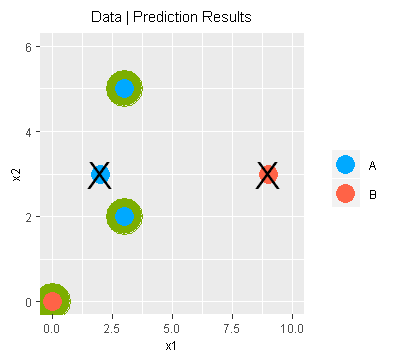

In [22]:
output_size(3.3,3)
ggplot(data) + ggtitle("Data | Prediction Results") + xlim(0,10) + ylim(0,6) +
geom_point(aes(x=x1, y=x2), color=PALETTE[3], size=10, data=data.u[data.u$hit,]) +
geom_point(aes(x=x1, y=x2, color=factor(class))) +
geom_text(aes(x=x1, y=x2), label="X", size=8, data=data.u[!data.u$hit,])
output_size(restore)

## Evaluation by Out-of-Sample Performance

Evaluation by out-of-sample performance is another one of three popular versions of evaluation.  It uses some of the reference classified dataset, referred to in this context as holdin training data, to construct a similar classifier.  It uses the rest of the reference classified dataset, referred to in this context as holdout testing data, to predict and compare class values.

Evaluation by out-of-sample performance is considered to produce better estimates of prediction quality than evaluation by in-sample performance does.  It avoids the problem of using the same data for both training and testing.  However, it has its own inherent problem in that it uses only some of the reference classified data to train and only some to test.  Imagine a student that studies the answers to certain questions and then is tested on other questions, but not tested on any of the questions for which she studied.  Further, consider that had she studied the answers to those other questions she may have performed better.  The results may understate or overstate how the student would perform on other tests.  In a business situation, imagine a classifier that is constructed from a certain dataset and then back-predicts another dataset.  The results may understate or overstate how the classifier would perform classifying the still another dataset. 

Out-of-sample performance is also known as holdout performance.

<table style="border:1px solid; margin-top:20px">
    <caption style="text-align:center">Out-of-Sample Evaluation of a Classifier</caption>
    <tr><td style="padding:20px; background-color:white"><img src="classification_outofsample.jpg" width=950></td></tr>
</table><br clear=all>

Here's an example of evaluation by out-of-sample performance of an operative classifier, which was constructed by the "Special Classifier Construction Method" based on the 5-observation reference classified dataset.

In [23]:
fmt(data)

x1,x2,class
3,5,A
2,3,A
9,3,B
0,0,B
3,2,A


In [24]:
model.operative = my_classifier_construction_method(class ~ x1+x2, data, hyperparameter=0.7)
fmt.model(model.operative)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,3.4,"A, B"


Partition the reference classified dataset into a holdin part for training and a holdout part for testing.  Here we chose to tag 40% of the dataset's observations, sampled at random, as holdout: observations 1 and 3.  We tag the remaining 60% of the dataset as holdin: observations 2, 4, and 5.

In [25]:
set.seed(0016)
holdout = sample(1:nrow(data), 0.40*nrow(data))
holdin  = setdiff(1:nrow(data), holdout)
data.test  = data[holdout,]
data.train = data[holdin,]

layout(fmt(holdout, force=TRUE), fmt(data.test), fmt(holdin, force=TRUE), fmt(data.train), nrow=2)

holdout 
 
 
 
 
 1 
 
 
 3 
 
 
 
 data.test 
 
 
 x1 
 x2 
 class 
 
 
 
 
 3 
 5 
 A 
 
 
 9 
 3 
 B 
 
 
 
   
 
 
 holdin 
 
 
 
 
 2 
 
 
 4 
 
 
 5 
 
 
 
 data.train 
 
 
 x1 
 x2 
 class 
 
 
 
 
 2 
 3 
 A 
 
 
 0 
 0 
 B 
 
 
 3 
 2 
 A

Input the 3-observation holdin dataset to the "Special Classifier Construction Method" to construct a similar classifier, which will be different than the operative classifier.

In [26]:
model = my_classifier_construction_method(class ~ x1+x2, data.train, hyperparameter=0.7)
fmt.model(model)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,1.666667,"A, B"


Input the 2-observation holdout dataset to the similar classifier to produce class probabilities and predict 2 class values, and in turn compare to the 2 known class values.  From there, we construct a confusion matrix and use it to compute a performance metric, in this example accuracy 0.50, which is an estimate of the operative classifier's prediction quality.  At this point, you can discard the similar classifier.

In [27]:
cutoff = 0.5

data.u.test = data.test; data.u.test$class = NULL

prob = predict(model, data.u.test)
data.u.test$prob.A = prob[,"A"]
data.u.test$class.predicted = as.class(prob, class="A", cutoff)

data.u.test$hit = data.u.test$class.predicted == data.test$class

CM = confusionMatrix(data.u.test$class.predicted, data.test$class)$table
cm = CM / sum(CM)

accuracy = (cm[1,1]+cm[2,2])/sum(cm)

layout(fmt(data.test), fmt(cutoff, force=TRUE), fmt(data.u.test, "data.test (known class is hidden)"), fmt.cm(cm), fmt(accuracy, force=TRUE))

data.test 
 
 
 x1 
 x2 
 class 
 
 
 
 
 3 
 5 
 A 
 
 
 9 
 3 
 B 
 
 
 
   
 
 
 cutoff 
 
 
 
 
 0.5 
 
 
 
 data.test (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 hit 
 
 
 
 
 3 
 5 
 1 
 A 
 TRUE 
 
 
 9 
 3 
 1 
 A 
 FALSE 
 
 
 
 cm 
 
 
 
 A 
 B 
 
 
 
 
 A 
 0.5 
 0.5 
 
 
 B 
 0.0 
 0.0 
 
 
 
   
 
 
 accuracy 
 
 
 
 
 0.5

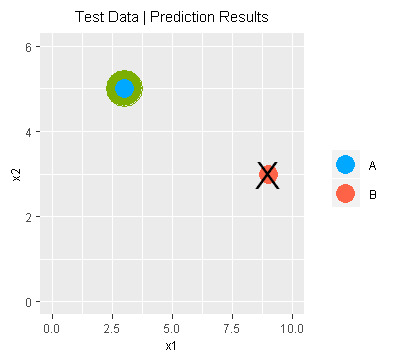

In [28]:
output_size(3.3,3)
ggplot(data.test) + ggtitle("Test Data | Prediction Results") + xlim(0,10) + ylim(0,6) +
geom_point(aes(x=x1, y=x2), color=PALETTE[3], size=10, data=data.u.test[data.u.test$hit,]) +
geom_point(aes(x=x1, y=x2, color=factor(class))) +
geom_text(aes(x=x1, y=x2), label="X", size=8, data=data.u.test[!data.u.test$hit,])
output_size(restore)

## Evaluation by Cross-Validation Performance

Evaluation by cross-validation performance is yet another one of three popular versions of evaluation.  It works by organizing a reference classified dataset into several approximately equally sized folds, where each fold comprises a subset of the dataset for training and the rest of the dataset for testing. It uses all of the reference classified dataset, but only one subset at a time, to construct several similar classifiers.  It uses all of the reference classified dataset, but only one subset at a time, to predict and compare class values.

Evaluation by cross-validation performance is considered to produce better estimates of prediction quality than either evaluation by in-sample or out-of-sample performance do.  It avoids the problem of using the same data for both training and testing.  It also avoids the problem of using only some of the reference classified data to train and only some to test.

In practice, evaluation by cross-validation performance is often done with 5 or 10 folds. 

<table style="border:1px solid; margin-top:20px">
    <caption style="text-align:center">Cross-Validation Evaluation of a Classifier</caption>
    <tr><td style="padding:20px; background-color:white"><img src="classification_xval.jpg" width=950></td></tr>
</table><br clear=all>

Here's an example of evaluation by cross-validation performance of an operative classifier, which was constructed by the "Special Classifier Construction Method" based on the 5-observation reference classified dataset.  

In [29]:
fmt(data)

x1,x2,class
3,5,A
2,3,A
9,3,B
0,0,B
3,2,A


In [30]:
model.operative = my_classifier_construction_method(class ~ x1+x2, data, hyperparameter=0.7)
fmt.model(model.operative)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,3.4,"A, B"


Organize the reference classified dataset into several approximately equally sized folds.  Do this by first partitioning the dataset into approximately equally sized subsets, sampling at random.  Here we chose to organize as 3 folds, and so partition into 3 subsets: observations 4 and 5; observation 2; and observations 1 and 3.

In [31]:
set.seed(0026)
fold = createFolds(data$class, k=3)
data.frame(t(fold))

Fold1,Fold2,Fold3
"4, 5",2,"1, 3"


For each fold, assign one of the subsets to be its testing dataset.  Then for each fold, assign the part of the reference dataset not used for testing in that fold to be its training dataset.  Here the first fold comprises a 3-observation dataset for training and a 2-observation dataset for testing.  The dataset for training comprises observations 1, 2, and 3.  The dataset for testing comprises observations 4 and 5.  Similarly for folds 2 and 3. 

Note that some observations used for training will be duplicated across folds, but no observations used for testing will be duplicated across folds.  Also note that each fold uses all of the reference dataset, some for training and the rest for testing.

**Fold #1:**

In [32]:
data_1.test  = data[fold$Fold1,]
data_1.train = data[setdiff(1:nrow(data), fold$Fold1),]

layout(fmt(data_1.train), fmt(data_1.test))

x1,x2,class
3,5,A
2,3,A
9,3,B
x1,x2,class
0,0,B
3,2,A


**Fold #2:**

In [33]:
data_2.test  = data[fold$Fold2,]
data_2.train = data[setdiff(1:nrow(data), fold$Fold2),]

layout(fmt(data_2.train), fmt(data_2.test))

x1,x2,class
3,5,A
9,3,B
0,0,B
3,2,A
x1,x2,class
2,3,A


**Fold #3:**

In [34]:
data_3.test  = data[fold$Fold3,]
data_3.train = data[setdiff(1:nrow(data), fold$Fold3),]

layout(fmt(data_3.train), fmt(data_3.test))

x1,x2,class
2,3,A
0,0,B
3,2,A
x1,x2,class
3,5,A
9,3,B


For each fold, input its dataset for training to the "Special Classifier Construction Method" to construct a similar classifier, and input its dataset for testing to that classifier to produce class probabilities, predict class values, construct a confusion matrix, and compute a performance metric.  Note that we construct 3 different similar classifiers and compute 3 different performance metrics.  Here the first fold performance metric is accuracy 0.50, the second fold performance metric is accuracy 0.00, and the thrid fold perfromance metric is accuracy 0.50.

**Fold #1:**

In [35]:
model_1 = my_classifier_construction_method(class ~ x1+x2, data_1.train, hyperparameter=0.7)
fmt.model(model_1)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,4.666667,"A, B"


In [36]:
cutoff = 0.5

data_1.u.test = data_1.test; data_1.u.test$class = NULL

prob = predict(model_1, data_1.u.test)
data_1.u.test$prob.A = prob[,"A"]
data_1.u.test$class.predicted = as.class(prob, class="A", cutoff)

data_1.u.test$hit = (data_1.u.test$class.predicted == data_1.test$class)

CM = confusionMatrix(data_1.u.test$class.predicted, data_1.test$class)$table
cm = CM / sum(CM)

accuracy_1 = (cm[1,1]+cm[2,2])/sum(cm)

layout(fmt(data_1.test), fmt(cutoff, force=TRUE), fmt(data_1.u.test, "data_1.test (known class is hidden)"), fmt.cm(cm), fmt(accuracy_1, force=TRUE))

data_1.test 
 
 
 x1 
 x2 
 class 
 
 
 
 
 0 
 0 
 B 
 
 
 3 
 2 
 A 
 
 
 
   
 
 
 cutoff 
 
 
 
 
 0.5 
 
 
 
 data_1.test (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 hit 
 
 
 
 
 0 
 0 
 0.00 
 B 
 TRUE 
 
 
 3 
 2 
 0.45 
 B 
 FALSE 
 
 
 
 cm 
 
 
 
 A 
 B 
 
 
 
 
 A 
 0.0 
 0.0 
 
 
 B 
 0.5 
 0.5 
 
 
 
   
 
 
 accuracy_1 
 
 
 
 
 0.5

**Fold #2:**

In [37]:
model_2 = my_classifier_construction_method(class ~ x1+x2, data_2.train, hyperparameter=0.7)
fmt.model(model_2)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,3.75,"A, B"


In [38]:
cutoff = 0.5

data_2.u.test = data_2.test; data_2.u.test$class = NULL

prob = predict(model_2, data_2.u.test)
data_2.u.test$prob.A = prob[,"A"]
data_2.u.test$class.predicted = as.class(prob, class="A", cutoff)

data_2.u.test$hit = data_2.u.test$class.predicted == data_2.test$class

CM = confusionMatrix(data_2.u.test$class.predicted, data_2.test$class)$table
cm = CM / sum(CM)

accuracy_2 = (cm[1,1]+cm[2,2])/sum(cm)

layout(fmt(data_2.test), fmt(cutoff, force=TRUE), fmt(data_2.u.test, "data_2.test (known class is hidden)"), fmt.cm(cm), fmt(accuracy_2, force=TRUE))

data_2.test 
 
 
 x1 
 x2 
 class 
 
 
 
 
 2 
 3 
 A 
 
 
 
   
 
 
 cutoff 
 
 
 
 
 0.5 
 
 
 
 data_2.test (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 hit 
 
 
 
 
 2 
 3 
 0.3733333 
 B 
 FALSE 
 
 
 
 cm 
 
 
 
 A 
 B 
 
 
 
 
 A 
 0 
 0 
 
 
 B 
 1 
 0 
 
 
 
   
 
 
 accuracy_2 
 
 
 
 
 0

**Fold #3:**

In [39]:
model_3 = my_classifier_construction_method(class ~ x1+x2, data_3.train, hyperparameter=0.7)
fmt.model(model_3)

method,vars,parameter_1,parameter_2,classes
Special Classifier Construction Method,"x1, x2",0.35,1.666667,"A, B"


In [40]:
cutoff = 0.5

data_3.u.test = data_3.test; data_3.u.test$class = NULL


prob = predict(model_3, data_3.u.test)
data_3.u.test$prob.A = prob[,"A"]
data_3.u.test$class.predicted = as.class(prob, class="A", cutoff)

data_3.u.test$hit = data_3.u.test$class.predicted == data_3.test$class

CM = confusionMatrix(data_3.u.test$class.predicted, data_3.test$class)$table
cm = CM / sum(CM)

accuracy_3 = (cm[1,1]+cm[2,2])/sum(cm)

layout(fmt(data_3.test), fmt(cutoff, force=TRUE), fmt(data_3.u.test, "data_3.test (known class is hidden)"), fmt.cm(cm), fmt(accuracy_3, force=TRUE))

data_3.test 
 
 
 x1 
 x2 
 class 
 
 
 
 
 3 
 5 
 A 
 
 
 9 
 3 
 B 
 
 
 
   
 
 
 cutoff 
 
 
 
 
 0.5 
 
 
 
 data_3.test (known class is hidden) 
 
 
 x1 
 x2 
 prob.A 
 class.predicted 
 hit 
 
 
 
 
 3 
 5 
 1 
 A 
 TRUE 
 
 
 9 
 3 
 1 
 A 
 FALSE 
 
 
 
 cm 
 
 
 
 A 
 B 
 
 
 
 
 A 
 0.5 
 0.5 
 
 
 B 
 0.0 
 0.0 
 
 
 
   
 
 
 accuracy_3 
 
 
 
 
 0.5

Here is a comparison of the prediction results across the 3 folds. 

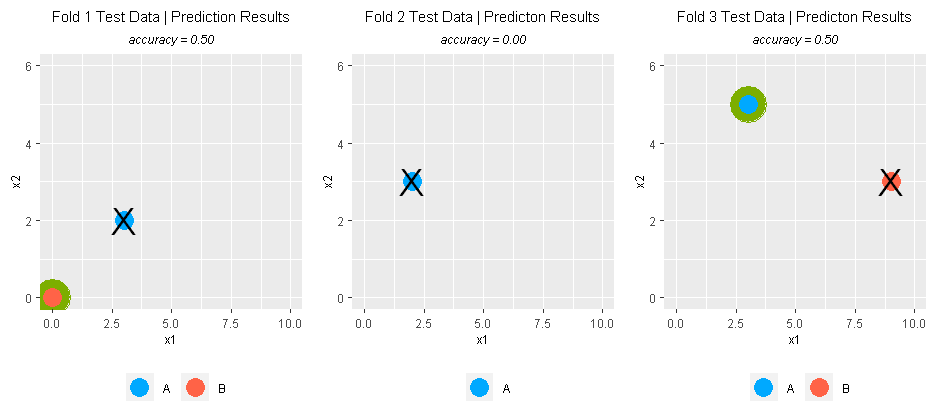

In [41]:
output_size(7.8,3.5)

p1 = ggplot(data_1.test) + xlim(0,10) + ylim(0,6) + ggtitle("Fold 1 Test Data | Prediction Results", sprintf("accuracy = %0.2f", accuracy_1)) +
     geom_point(aes(x=x1, y=x2), color=PALETTE[3], size=10, data=data_1.u.test[data_1.u.test$hit,]) +
     geom_point(aes(x=x1, y=x2, color=factor(class))) +
     geom_text(aes(x=x1, y=x2), label="X", size=8, data=data_1.u.test[!data_1.u.test$hit,]) +
     theme.legend_below

p2 = ggplot(data_2.test) + xlim(0,10) + ylim(0,6) + ggtitle("Fold 2 Test Data | Predicton Results", sprintf("accuracy = %0.2f", accuracy_2)) +
     geom_point(aes(x=x1, y=x2), color=PALETTE[3], size=10, data=data_2.u.test[data_2.u.test$hit,]) +
     geom_point(aes(x=x1, y=x2, color=factor(class))) +
     geom_text(aes(x=x1, y=x2), label="X", size=8, data=data_2.u.test[!data_2.u.test$hit,]) +
     theme.legend_below

p3 = ggplot(data_3.test) + xlim(0,10) + ylim(0,6) + ggtitle("Fold 3 Test Data | Predicton Results", sprintf("accuracy = %0.2f", accuracy_3)) +
     geom_point(aes(x=x1, y=x2), color=PALETTE[3], size=10, data=data_3.u.test[data_3.u.test$hit,]) +
     geom_point(aes(x=x1, y=x2, color=factor(class))) +
     geom_text(aes(x=x1, y=x2), label="X", size=8, data=data_3.u.test[!data_3.u.test$hit,]) +
     theme.legend_below

grid.arrange(p1, p2, p3, nrow=1)

output_size(restore)

Compute the average of the 3 performance metrics, in this example accuracy 0.33, which is an estimate of the operative classifier's prediction quality.  At this point, you can discard all 3 of the similar classifiers.

In [42]:
layout(data.frame(fold=1:3, accuracy=c(accuracy_1, accuracy_2, accuracy_3)),
       fmt(mean(c(accuracy_1, accuracy_2, accuracy_3)), "accuracy.cv"))

fold 
 accuracy 
 
 
 
 
 1 
 0.5 
 
 
 2 
 0.0 
 
 
 3 
 0.5 
 
 
 
 
 
 accuracy.cv 
 
 
 
 
 0.3333333

## Business Value

To really be useful, evaluation of the performance of a classifier should say something about its business value.  So, construct a decision model to transform performance metric values to business value.  The decision model should accept business parameter values and one or more performance metric values as inputs, do some calculations regarding the effects of various decisions in the context of the input values, and produce a measure of expected business value as output.

Imagine planning some product advertising campaign.  So, you construct a classifier based on historical campaign effectiveness.  Calculate the true positive rate and false positive rate as measures of how well it predicts whether you product will be adopted.  Then, in combination with assumptions about maximum potential campaign effectiveness, total number of customers, product pricing, and other business parameters, calculate expected number of customers that will adopt your product.  Compare that to expected number of customers were product adoption predicted some other way.  You now know the business value of the regressor.

## Sensitivity Analysis

Before proceeding with a business decision influenced by your estimate of business value, you may want to test how sensitive your estimate is to the business parameters. If large changes to business parameter values would only minimally affect your estimate of business value, then you can have confidence in you business decision.  Conversely, if small changes to business parameter values would greatly affect your estimate of business value, then you face increased risk around your business decision.

Imagine your estimate of product adoption would differ by 90% if product pricing differed by only 1%.  In this situation, if you are making your business decision counting on a certain level of product adoption and you do not have control over product pricing, then this is indeed a risky (and perhaps even irresponsible) business decision.

## Code

Here are some R functions used in our discourse and some R code templates that you can modify and use in your own analyses. 

### Useful Functions

In [43]:
# as.class              # from setup.R
# fmt.cm                # from setup.R

# help(set.seed)        # from base library
# help(sample)          # from base library
# help(colnames)        # from base library
# help(createFolds)     # from caret library
# help(setdiff)         # from base library
# help(predict)         # from stats library
# help(confusionMatrix) # from caret library

### Templates

In [44]:
# Construct a model, make predictions, see confusion matrix 

data = data.frame(x1=c(1,2,3,4,5,6,7,8,9),
                  x2=c(4,3,4,2,1,3,0,9,2),
                  class=c("A","B","B","A","A","B","B","A","A"))

model = naiveBayes(class ~ x1+x2, data) # use your choice of classifier construction method

prob = predict(model, data, type="raw") # predict function uses only predictor variables (e.g., x1 & x2)
class.predicted = as.class(prob, class="A", cutoff=0.5)

CM = confusionMatrix(class.predicted, data$class)$table
cm = CM / sum(CM)

cm
fmt.cm(cm)
fmt(cm)

          Reference
Prediction         A         B
         A 0.2222222 0.1111111
         B 0.3333333 0.3333333

,A,B
A,0.2222222,0.1111111
B,0.3333333,0.3333333


Prediction,Reference,Freq
A,A,0.2222222
B,A,0.3333333
A,B,0.1111111
B,B,0.3333333


In [45]:
# Evaluate model performance by in-sample 

data = data.frame(x1=c(1,2,3,4,5,6,7,8,9),
                  x2=c(4,3,4,2,1,3,0,9,2),
                  class=c("A","B","B","A","A","B","B","A","A"))

model = naiveBayes(class ~ x1+x2, data)
prob = predict(model, data, type="raw")
class.predicted = as.class(prob, class="A", cutoff=0.5)
   
CM = confusionMatrix(class.predicted, data$class)$table
cm = CM/sum(CM)
accuracy = cm[1,1]+cm[2,2]

fmt(accuracy)

accuracy
0.5555556


In [46]:
# Evaluate model performance by out-of-sample 

data = data.frame(x1=c(1,2,3,4,5,6,7,8,9),
                  x2=c(4,3,4,2,1,3,0,9,2),
                  class=c("A","B","B","A","A","B","B","A","A"))

set.seed(0)
holdout = sample(1:nrow(data), 0.25*nrow(data))
holdin  = setdiff(1:nrow(data), holdout)
data.test  = data[holdout,]
data.train = data[holdin,]

model = naiveBayes(class ~ x1+x2, data.train)
prob = predict(model, data.test, type="raw")
class.predicted = as.class(prob, class="A", cutoff=0.5)
   
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy = cm[1,1]+cm[2,2]

fmt(accuracy)

accuracy
0


In [47]:
# Evaluate model performance by cross-validation 

data = data.frame(x1=c(1,2,3,4,5,6,7,8,9),
                  x2=c(4,3,4,2,1,3,0,9,2),
                  class=c("A","B","B","A","A","B","B","A","A"))

set.seed(0)
fold = createFolds(data$class, k=3)

accuracy = c()

# Fold #1
data.test  = data[fold[[1]],]
data.train = data[setdiff(1:nrow(data), fold[[1]]),]
model = naiveBayes(class ~ x1+x2, data.train)
prob = predict(model, data.test, type="raw")
class.predicted = as.class(prob, class="A", cutoff=0.5)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy[1] = cm[1,1]+cm[2,2]

# Fold #2
data.test  = data[fold[[2]],]
data.train = data[setdiff(1:nrow(data), fold[[2]]),]
model = naiveBayes(class ~ x1+x2, data.train)
prob = predict(model, data.test, type="raw")
class.predicted = as.class(prob, class="A", cutoff=0.5)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy[2] = cm[1,1]+cm[2,2]

# Fold #3
data.test  = data[fold[[3]],]
data.train = data[setdiff(1:nrow(data), fold[[3]]),]
model = naiveBayes(class ~ x1+x2, data.train)
prob = predict(model, data.test, type="raw")
class.predicted = as.class(prob, class="A", cutoff=0.5)
CM = confusionMatrix(class.predicted, data.test$class)$table
cm = CM/sum(CM)
accuracy[3] = cm[1,1]+cm[2,2]

accuracy.cv = mean(accuracy)

data.frame(fold=1:3, accuracy)
fmt(accuracy.cv)

fold,accuracy
1,0.6666667
2,0.3333333
3,0.3333333


accuracy.cv
0.4444444


In [48]:
# Evaluate model performance by cross-validation (with automatic iteration)

data = data.frame(x1=c(1,2,3,4,5,6,7,8,9),
                  x2=c(4,3,4,2,1,3,0,9,2),
                  class=c("A","B","B","A","A","B","B","A","A"))

set.seed(0)
fold = createFolds(data$class, k=3)

accuracy = c()

for (i in 1:3)
  { data.test  = data[fold[[i]],]
    data.train = data[setdiff(1:nrow(data), fold[[i]]),]
    
    model = naiveBayes(class ~ x1+x2, data.train)
    prob = predict(model, data.test, type="raw")
    class.predicted = as.class(prob, class="A", cutoff=0.5)
   
    CM = confusionMatrix(class.predicted, data.test$class)$table
    cm = CM/sum(CM)
    accuracy[i] = cm[1,1]+cm[2,2] }

accuracy.cv = mean(accuracy)

data.frame(fold=1:3, accuracy)
fmt(accuracy.cv)

fold,accuracy
1,0.6666667
2,0.3333333
3,0.3333333


accuracy.cv
0.4444444


## What You Should Now Know

* Classification methodology, conceptually.
* Terminology regarding classification methodology.
* How to construct a classifier using a provided classifier construction method, conceptually and using R.
* How to use a classifier to determine class probabilities and make predictions, conceptually and using R.
* How to evaluate a classifier by insample, conceptually and using R.
* How to evaluate a classifier by out-of-sample/holdout, conceptually and using R.
* How to evaluate a classifier by cross-validation, conceptually and using R.

## Further Reading

* https://en.wikipedia.org/wiki/Confusion_matrix
* https://www.youtube.com/watch?v=fSytzGwwBVw
* https://www.youtube.com/watch?v=TIgfjmp-4BA
* http://ciml.info/dl/v0_99/ciml-v0_99-ch03.pdf
* http://www-stat.wharton.upenn.edu/~stine/mich/DM_05.pdf
* https://machinelearningmastery.com/much-training-data-required-machine-learning/

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised March 25, 2021
</span>
</p>